In [2]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("mlbootcamp5_train.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df["gender"].mode()

0    1
Name: gender, dtype: int64

In [10]:
df['gender'].value_counts()

gender
1    45530
2    24470
Name: count, dtype: int64

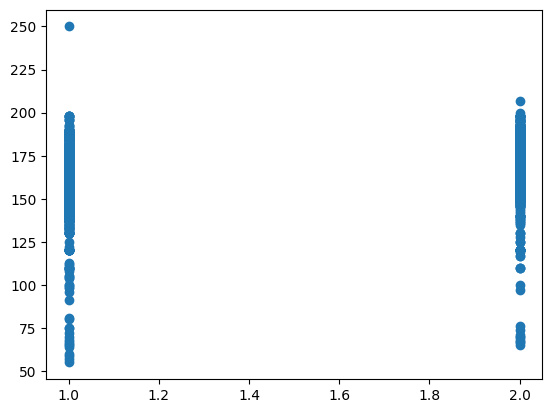

In [12]:
plt.scatter(x=df['gender'], y=df['height'])

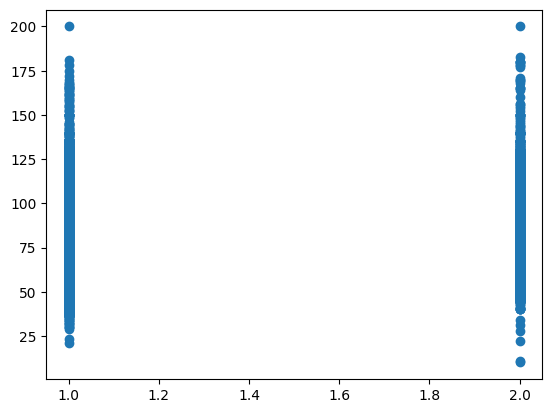

In [13]:
plt.scatter(x=df['gender'], y=df['weight'])

In [17]:
max(df[df['gender']==1].groupby('height'))

(250,
         id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
 6486  9223  21220       1     250    86.0    140    100            3     1   
 
       smoke  alco  active  cardio  
 6486      0     0       1       1  )

In [18]:
max(df[df['gender']==2].groupby('height'))

# hence => 1 stands for female sex, 2 - male sex


(207,
           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
 21628  30894  19054       2     207    78.0    100     70            1     1   
 
        smoke  alco  active  cardio  
 21628      0     1       1       0  )

In [43]:
# alco[alco["gender"]==1].value_counts()

id     age    gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
99977  18194  1       156     102.0   130    80     1            1     0      1     0       1         1
134    17363  1       167     71.0    120    80     2            1     0      1     1       1         1
136    18718  1       167     80.0    190    90     2            1     0      1     0       0         1
199    18068  1       160     90.0    130    90     1            1     0      1     1       0         1
213    16028  1       157     69.0    120    80     1            1     0      1     1       1         1
                                                                                                     ..
1326   18369  1       167     81.0    120    80     2            1     0      1     1       0         1
1348   20959  1       160     65.0    120    80     1            2     0      1     0       1         1
1369   19554  1       158     87.0    130    90     1            1   

In [49]:
# alco[alco['gender']==2]['id'].value_counts()
smoke = df[df['smoke']==1]
fem_smoke = len(smoke[smoke['gender']==1]['id'])
mal_smoke = len(smoke[smoke['gender']==2]['id'])
total_smoke = len(smoke)
print((mal_smoke-fem_smoke)*100/total_smoke)
# print(mal_smoke*100/total_smoke, fem_smoke*100/total_smoke)

73.64240557626844


In [50]:
smoke
# WHAT THE FUCK

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
14,23,14532,2,181,95.0,130,90,1,1,1,1,1,0
19,29,21755,2,162,56.0,120,70,1,1,1,0,1,0
38,52,23388,2,162,72.0,130,80,1,1,1,0,1,1
58,73,15901,2,172,84.0,140,90,1,1,1,0,1,1
59,74,20431,1,164,64.0,180,90,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69950,99933,19137,2,167,74.0,130,80,1,1,1,1,1,0
69953,99936,17373,2,173,69.0,110,70,1,1,1,1,1,1
69957,99941,15536,2,166,90.0,120,80,1,1,1,0,1,0
69970,99958,22572,2,173,103.0,140,80,3,1,1,1,0,1


In [58]:
total_men = len(df[df['gender']==2])
total_women = len(df[df['gender']==1])

male_percentage = (mal_smoke / total_men) * 100
female_percentage = (fem_smoke / total_women) * 100

difference = round(male_percentage - female_percentage)
print(difference)

20


In [62]:
smokers = df[df['smoke']==1]
nonsmokers = df[df['smoke']==0]
print(smokers['age'].median() - nonsmokers['age'].median())

-597.0


In [71]:
withCVD = df[df['cardio']==1]
SwithCVD = smokers[smokers['cardio']==1]
SwoutCVD = smokers[smokers['cardio']==0]
# print((len(SwoutCVD)-len(SwithCVD))/len(smokers))
# print(len(SwithCVD)/len(smokers))
print(len(smokers)/(len(SwoutCVD)-len(SwithCVD)))

# WHAT THE FUCK


19.836012861736336


In [25]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("mlbootcamp5_train.csv")
fem_weight, man_weight = df.groupby('gender')['weight'].mean()
fem_height, man_height = df.groupby('gender')['height'].mean()
fBMI = fem_weight/(fem_height**2)
mBMI = man_weight/(man_height**2)
# Women's BMI is on average higher then men's
bool(fBMI > mBMI)

True

In [29]:
hthy_weight, ill_weight = df.groupby('cardio')['weight'].median()
hthy_height, ill_height = df.groupby('cardio')['height'].median()

hthyBMI = hthy_weight/(hthy_height**2)
illBMI = ill_weight/(ill_height**2)

# Healthy people have higher median BMI than ill people

bool(hthyBMI > illBMI)


False

In [35]:
df['weight'].mean() / ((df['height'].mean())**2)*10000

np.float64(27.469390249400824)